# Interpolación en una imagen usando funciones *spline*

Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import lagrange

%matplotlib inline

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload() #Dar la direccion para cargar el archivo planetarios.png


Saving planetario.jpg to planetario.jpg


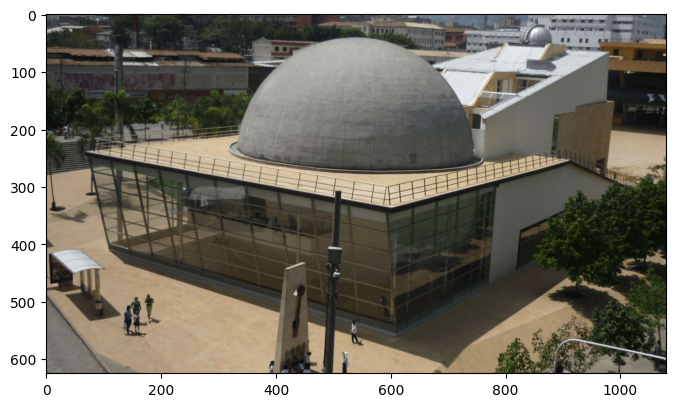

In [ ]:
# 1. Carguemos y mostremos la imagen
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg')
plt.imshow(imagen)
#plt.plot(x_*625, y_*1080, "ro")
plt.show()



In [ ]:
x_ = np.array([332,335,340,348,357,369,386,409,433,456,486,514,538,569,595,622,666,689,710,725,737,744,745])
y_ = np.array([233,212,192,170,149,128,107,88,71,58,48,42,41,43,49,58,86,106,133,162,191,221,250])


In [ ]:
x1=[]
y1=[]
for i in range(1,len(x_),2):
  x1.append(x_[i])
  y1.append(y_[i])


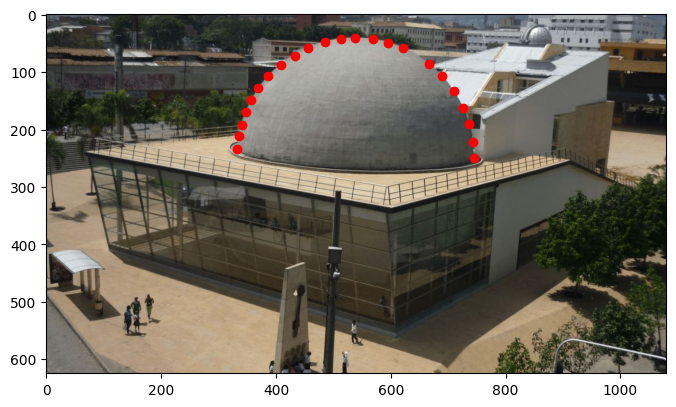

In [ ]:
# 1. Carguemos y mostremos la imagen
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg')
plt.imshow(imagen)
plt.plot(x_, y_, "ro")
plt.show()



In [ ]:

def P_n(xi,yi,x):
    '''
     *** P_n(x): polinomio de grado n evaluado en x ***
    Función del polinomio de lagrange (forma
    intuitiva de programación a partir de la definición).
    '''

    n = len(xi)          # grado del polinomio
    S = 0.0              # inicialización sumatoria
    for k in range(n):   # Sumatoria del polinomio en n+1 elementos
        # Forma intuitiva a partir de la fórmula
        L = 1
        for i in range(n):
            if i != k:
                L = L*(x-xi[i])/(xi[k]-xi[i])

        S  = S + yi[k]*L

    return S

In [ ]:
def Interpolacion_Lagrange(xi,yi,eps):
   ''' Esta funcion toma n+1 pares (xi,yi) de datos y los interpola
       en intervalo (x0,xn) usando el metodo de lagrange.'''

   n = len(xi)-1 # el array tiene n+1 elementos.
   print ("El grado del Pn(x) es:",n)

   x = np.arange(xi[0],xi[n], eps)  # Valores a interpolar
   P = np.array([P_n(xi,yi,xk) for xk in x]) # Polinomio P(x) de grado n evaluado en x

   plt.plot(x,P,label="Lagrange")       # Graficar interpolación de lagrange.
   plt.legend()
   plt.show()

El grado del Pn(x) es: 10


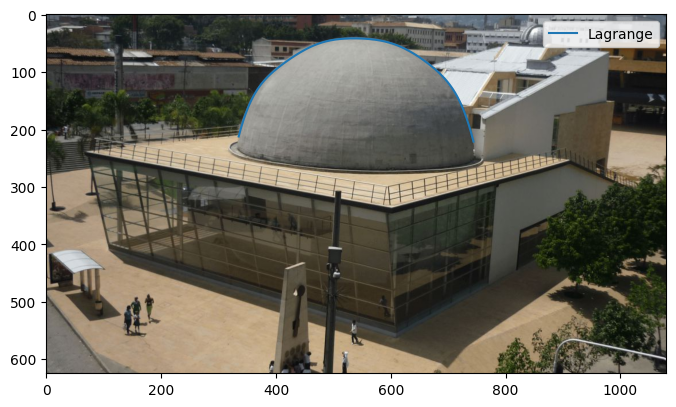

In [ ]:
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg')
plt.imshow(imagen)
Interpolacion_Lagrange(x1,y1,0.01)

#INTERPOLACION DIF. DIVIDIDAS

In [ ]:
def D( i, k, Xn, Yn ):
    #si k+i>N
    if i+k>=len(Xn):
        return 0
    #1 diferencias divididas
    elif k == 0:
        return Yn[i]
    #k-esimas diferencias divididas
    else:
        return (D(i+1, k-1, Xn, Yn)-D(i, k-1, Xn, Yn))/(Xn[i+k]-Xn[i])

def Pn2(x, xi,yi):
   P = yi[0]                     # Inicializar suma
   prod=1
   for k in range(1,len(xi)):
      prod = prod*(x - xi[k-1])  # (x - xi[0])(x - xi[1]) ... (x - xi[k-1])
      P = P + D(0,k, xi, yi)*prod# Suma
   return P

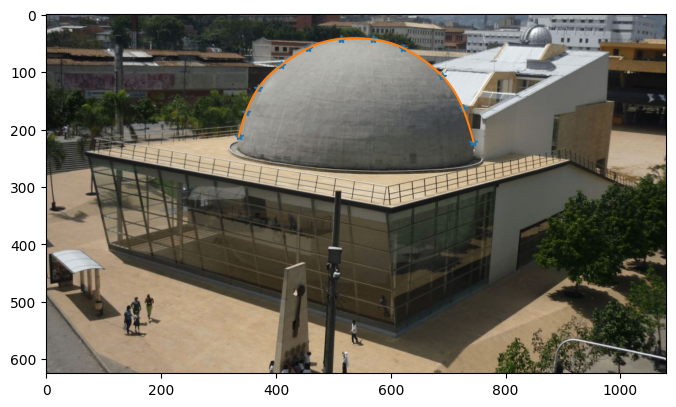

In [ ]:
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg')
plt.imshow(imagen)

plt.plot(x1,y1,'*',label='datos')  # graficar los puntos a interpolar
plt.plot(np.linspace(x1[0],x1[-1],10000),Pn2(np.linspace(x1[0],x1[-1],10000),x1,y1))
plt.show()